# Boston_city_Crime Data Analysis

DATA: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston

### import the useful libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [2]:
df = pd.read_csv(r"/Users/vaishali/Desktop/DAB-103/combined-csv-files.csv",encoding='latin',low_memory=False)

In [3]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240.0,NaN,42614,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760.0,NaN,42614.375,2016,9,Thursday,9,Part Two,BEECHCROFT ST,42.351673,-71.161152,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113.0,NaN,42584,2016,8,Tuesday,0,Part One,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113.0,NaN,42584,2016,8,Tuesday,0,Part Two,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328.0,NaN,42619.54236,2016,9,Tuesday,13,Part Two,FERNBORO ST,42.311296,-71.077283,"(42.31129587, -71.07728269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450979,121005808,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,B3,289.0,0,1/19/2021 12:00,2021,1,Tuesday,12,NaN,CLARKWOOD ST,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
450980,121000816,3304,NaN,NOISY PARTY/RADIO-NO ARREST,E5,675.0,0,1/4/2021 0:00,2021,1,Monday,0,NaN,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)"
450981,120221042,3006,NaN,SICK/INJURED/MEDICAL - PERSON,E5,680.0,0,4/2/2021 10:45,2021,4,Friday,10,NaN,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)"
450982,10637224,3125,NaN,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,D4,270.0,0,1/26/2021 18:54,2021,1,Tuesday,18,NaN,NORTHAMPTON ST,42.333951,-71.075389,"(42.3339512483938, -71.0753893882269)"


### understanding the data

In [5]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240.0,NaN,42614,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760.0,NaN,42614.375,2016,9,Thursday,9,Part Two,BEECHCROFT ST,42.351673,-71.161152,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113.0,NaN,42584,2016,8,Tuesday,0,Part One,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113.0,NaN,42584,2016,8,Tuesday,0,Part Two,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328.0,NaN,42619.54236,2016,9,Tuesday,13,Part Two,FERNBORO ST,42.311296,-71.077283,"(42.31129587, -71.07728269)"


In [6]:
df.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
450979,121005808,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,B3,289.0,0,1/19/2021 12:00,2021,1,Tuesday,12,NaN,CLARKWOOD ST,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
450980,121000816,3304,NaN,NOISY PARTY/RADIO-NO ARREST,E5,675.0,0,1/4/2021 0:00,2021,1,Monday,0,NaN,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)"
450981,120221042,3006,NaN,SICK/INJURED/MEDICAL - PERSON,E5,680.0,0,4/2/2021 10:45,2021,4,Friday,10,NaN,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)"
450982,10637224,3125,NaN,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,D4,270.0,0,1/26/2021 18:54,2021,1,Tuesday,18,NaN,NORTHAMPTON ST,42.333951,-71.075389,"(42.3339512483938, -71.0753893882269)"
450983,23844463,3115,NaN,INVESTIGATE PERSON,C6,NaN,0,10/16/2021 1:16,2021,10,Saturday,1,NaN,G ST & E 8TH ST\nBOSTON MA 02127\nUNITED STATES,42.331320,-71.044080,"(42.3313200390092, -71.0440799616656)"


In [7]:
df.shape

(450984, 17)

In [8]:
df.describe()

,OFFENSE_CODE,REPORTING_AREA,YEAR,MONTH,HOUR,Lat,Long
count,450984.000000,410077.000000,450984.000000,450984.000000,450984.000000,430582.000000,4.305820e+05
mean,2346.372051,383.155405,2018.096074,6.655050,13.011586,41.794461,-7.020191e+01
std,1194.838880,241.151653,1.726391,3.383111,6.327958,4.704894,7.857814e+00
min,111.000000,0.000000,2016.000000,1.000000,0.000000,-1.000000,-7.117867e+01
25%,1102.000000,178.000000,2017.000000,4.000000,9.000000,42.296419,-7.109744e+01
50%,3005.000000,347.000000,2018.000000,7.000000,14.000000,42.325528,-7.107720e+01
75%,3201.000000,542.000000,2020.000000,10.000000,18.000000,42.348406,-7.106150e+01
max,99999.000000,962.000000,2021.000000,12.000000,23.000000,42.395042,5.250000e-08


In [9]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [10]:
df.nunique()

INCIDENT_NUMBER        415540
OFFENSE_CODE              231
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       269
DISTRICT                   13
REPORTING_AREA            879
SHOOTING                    3
OCCURRED_ON_DATE       340804
YEAR                        6
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                  13613
Lat                     24729
Long                    24223
Location                34254
dtype: int64

In [11]:
df['OFFENSE_CODE_GROUP'].unique()

array(['Harassment', 'Simple Assault', 'Larceny', 'Fraud',
       'Confidence Games', 'Investigate Person', 'Counterfeiting',
       'Violations', 'Residential Burglary', 'Aggravated Assault',
       'Property Lost', 'Vandalism', 'Investigate Property',
       'Embezzlement', 'Assembly or Gathering Violations',
       'Police Service Incidents', 'Other', 'Missing Person Located',
       'Missing Person Reported', 'Larceny From Motor Vehicle',
       'Property Related Damage', 'Firearm Violations', 'Warrant Arrests',
       'License Plate Related Incidents', 'Medical Assistance',
       'Auto Theft', 'Ballistics', 'HOME INVASION',
       'Restraining Order Violations', 'Criminal Harassment',
       'Verbal Disputes', 'Property Found', 'Robbery',
       'Motor Vehicle Accident Response', 'Disorderly Conduct',
       'Other Burglary', 'Towed', 'Auto Theft Recovery',
       'Commercial Burglary', 'License Violation', 'Fire Related Reports',
       'Drug Violation', 'Landlord/Tenant Dispute

In [12]:
df.isnull()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450979,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
450980,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
450981,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
450982,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [13]:
df.isnull().sum()

INCIDENT_NUMBER             2
OFFENSE_CODE                0
OFFENSE_CODE_GROUP     151328
OFFENSE_DESCRIPTION         0
DISTRICT                 3021
REPORTING_AREA          40907
SHOOTING               298452
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               151423
STREET                  10614
Lat                     20402
Long                    20402
Location                    0
dtype: int64

In [14]:
df['INCIDENT_NUMBER'].is_unique

False

In [15]:
index=(df[df['OFFENSE_CODE_GROUP'].isnull()==True].index.values)

In [16]:
index

array([299656, 299657, 299658, ..., 450981, 450982, 450983])

In [18]:
df['OFFENSE_CODE_GROUP'].fillna("N/A",inplace=True)
index=(df[df['OFFENSE_CODE_GROUP'].isnull()==True].index.values)
index

array([], dtype=int64)

In [19]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240.0,NaN,42614,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760.0,NaN,42614.375,2016,9,Thursday,9,Part Two,BEECHCROFT ST,42.351673,-71.161152,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113.0,NaN,42584,2016,8,Tuesday,0,Part One,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113.0,NaN,42584,2016,8,Tuesday,0,Part Two,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328.0,NaN,42619.54236,2016,9,Tuesday,13,Part Two,FERNBORO ST,42.311296,-71.077283,"(42.31129587, -71.07728269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450979,121005808,1102,N/A,FRAUD - FALSE PRETENSE / SCHEME,B3,289.0,0,1/19/2021 12:00,2021,1,Tuesday,12,NaN,CLARKWOOD ST,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
450980,121000816,3304,N/A,NOISY PARTY/RADIO-NO ARREST,E5,675.0,0,1/4/2021 0:00,2021,1,Monday,0,NaN,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)"
450981,120221042,3006,N/A,SICK/INJURED/MEDICAL - PERSON,E5,680.0,0,4/2/2021 10:45,2021,4,Friday,10,NaN,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)"
450982,10637224,3125,N/A,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,D4,270.0,0,1/26/2021 18:54,2021,1,Tuesday,18,NaN,NORTHAMPTON ST,42.333951,-71.075389,"(42.3339512483938, -71.0753893882269)"


In [20]:
df['REPORTING_AREA'].fillna("N/A",inplace=True)
index=(df[df['REPORTING_AREA'].isnull()==True].index.values)
index

array([], dtype=int64)

In [21]:
df['INCIDENT_NUMBER'].fillna("N/A",inplace=True)
index=(df[df['INCIDENT_NUMBER'].isnull()==True].index.values)
index

array([], dtype=int64)

In [22]:
df['OFFENSE_CODE'].fillna("N/A",inplace=True)
index=(df[df['OFFENSE_CODE'].isnull()==True].index.values)
index

array([], dtype=int64)

In [23]:
df['OFFENSE_DESCRIPTION'].fillna("N/A",inplace=True)
index=(df[df['OFFENSE_DESCRIPTION'].isnull()==True].index.values)
index


array([], dtype=int64)

In [24]:
df['DISTRICT'].fillna("N/A",inplace=True)
index=(df[df['DISTRICT'].isnull()==True].index.values)
index

array([], dtype=int64)

In [25]:
df['REPORTING_AREA'].fillna("N/A",inplace=True)
index=(df[df['REPORTING_AREA'].isnull()==True].index.values)
index

array([], dtype=int64)

In [26]:
df['SHOOTING'].fillna("N/A",inplace=True)
index=(df[df['SHOOTING'].isnull()==True].index.values)
index

array([], dtype=int64)

In [27]:
df['OCCURRED_ON_DATE'].fillna("N/A",inplace=True)
index=(df[df['OCCURRED_ON_DATE'].isnull()==True].index.values)
index

array([], dtype=int64)

In [28]:
df['YEAR'].fillna("N/A",inplace=True)
index=(df[df['YEAR'].isnull()==True].index.values)
index

array([], dtype=int64)

In [29]:
df['HOUR'].fillna("N/A",inplace=True)
index=(df[df['HOUR'].isnull()==True].index.values)
index

array([], dtype=int64)

In [30]:
df['UCR_PART'].fillna("N/A",inplace=True)
index=(df[df['UCR_PART'].isnull()==True].index.values)
index

array([], dtype=int64)

In [31]:
df['STREET'].fillna("N/A",inplace=True)
index=(df[df['STREET'].isnull()==True].index.values)
index

array([], dtype=int64)

In [32]:
df['Lat'].fillna("N/A",inplace=True)
index=(df[df['Lat'].isnull()==True].index.values)
index

array([], dtype=int64)

In [33]:
df['Long'].fillna("N/A",inplace=True)
index=(df[df['Long'].isnull()==True].index.values)
index

array([], dtype=int64)

In [34]:
df['Location'].fillna("N/A",inplace=True)
index=(df[df['Location'].isnull()==True].index.values)
index

array([], dtype=int64)

In [35]:
df


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240.0,N/A,42614,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760.0,N/A,42614.375,2016,9,Thursday,9,Part Two,BEECHCROFT ST,42.351673,-71.161152,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113.0,N/A,42584,2016,8,Tuesday,0,Part One,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113.0,N/A,42584,2016,8,Tuesday,0,Part Two,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328.0,N/A,42619.54236,2016,9,Tuesday,13,Part Two,FERNBORO ST,42.311296,-71.077283,"(42.31129587, -71.07728269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450979,121005808,1102,N/A,FRAUD - FALSE PRETENSE / SCHEME,B3,289.0,0,1/19/2021 12:00,2021,1,Tuesday,12,N/A,CLARKWOOD ST,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
450980,121000816,3304,N/A,NOISY PARTY/RADIO-NO ARREST,E5,675.0,0,1/4/2021 0:00,2021,1,Monday,0,N/A,BRADFIELD AVENUE,0.0,0.0,"(0, 0)"
450981,120221042,3006,N/A,SICK/INJURED/MEDICAL - PERSON,E5,680.0,0,4/2/2021 10:45,2021,4,Friday,10,N/A,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)"
450982,10637224,3125,N/A,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,D4,270.0,0,1/26/2021 18:54,2021,1,Tuesday,18,N/A,NORTHAMPTON ST,42.333951,-71.075389,"(42.3339512483938, -71.0753893882269)"


In [36]:
df.drop(['Long','Lat'],axis=1,inplace=True)

In [37]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240.0,N/A,42614,2016,9,Thursday,0,Part Two,CONRAD ST,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760.0,N/A,42614.375,2016,9,Thursday,9,Part Two,BEECHCROFT ST,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113.0,N/A,42584,2016,8,Tuesday,0,Part One,HIGH ST,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113.0,N/A,42584,2016,8,Tuesday,0,Part Two,HIGH ST,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328.0,N/A,42619.54236,2016,9,Tuesday,13,Part Two,FERNBORO ST,"(42.31129587, -71.07728269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450979,121005808,1102,N/A,FRAUD - FALSE PRETENSE / SCHEME,B3,289.0,0,1/19/2021 12:00,2021,1,Tuesday,12,N/A,CLARKWOOD ST,"(42.3336792181085, -71.0918775461846)"
450980,121000816,3304,N/A,NOISY PARTY/RADIO-NO ARREST,E5,675.0,0,1/4/2021 0:00,2021,1,Monday,0,N/A,BRADFIELD AVENUE,"(0, 0)"
450981,120221042,3006,N/A,SICK/INJURED/MEDICAL - PERSON,E5,680.0,0,4/2/2021 10:45,2021,4,Friday,10,N/A,WASHINGTON ST,"(42.2839024364831, -71.130862626435)"
450982,10637224,3125,N/A,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,D4,270.0,0,1/26/2021 18:54,2021,1,Tuesday,18,N/A,NORTHAMPTON ST,"(42.3339512483938, -71.0753893882269)"


In [38]:
dup_row=df[df.duplicated(['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','DISTRICT','REPORTING_AREA','SHOOTING','OCCURRED_ON_DATE','YEAR','MONTH','DAY_OF_WEEK','HOUR','UCR_PART','STREET','Location'])]

In [39]:
dup_row.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Location
3602,I162103452,3502,Missing Person Located,MISSING PERSON - LOCATED,E5,697.0,N/A,42724.25,2016,12,Tuesday,6,Part Three,KENNETH ST,"(42.28523631, -71.14886058)"
5367,I162101528,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183.0,Y,42717.53125,2016,12,Tuesday,12,Part One,CLIFTON ST,"(42.32095643, -71.06992610)"
5529,I162101338,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C6,215.0,Y,42716.83542,2016,12,Monday,20,Part One,D ST,"(42.33670628, -71.05330809)"
5838,I162101004,3125,Warrant Arrests,WARRANT ARREST,B2,605.0,Y,42715.67569,2016,12,Sunday,16,Part Three,SUNSET ST,"(42.33110131, -71.10870352)"
5840,I162101004,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,605.0,Y,42715.67569,2016,12,Sunday,16,Part One,SUNSET ST,"(42.33110131, -71.10870352)"


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450984 entries, 0 to 450983
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   INCIDENT_NUMBER      450984 non-null  object
 1   OFFENSE_CODE         450984 non-null  int64 
 2   OFFENSE_CODE_GROUP   450984 non-null  object
 3   OFFENSE_DESCRIPTION  450984 non-null  object
 4   DISTRICT             450984 non-null  object
 5   REPORTING_AREA       450984 non-null  object
 6   SHOOTING             450984 non-null  object
 7   OCCURRED_ON_DATE     450984 non-null  object
 8   YEAR                 450984 non-null  int64 
 9   MONTH                450984 non-null  int64 
 10  DAY_OF_WEEK          450984 non-null  object
 11  HOUR                 450984 non-null  int64 
 12  UCR_PART             450984 non-null  object
 13  STREET               450984 non-null  object
 14  Location             450984 non-null  object
dtypes: int64(4), object(11)
memory usa

In [41]:
#to save file
df.to_csv('Boston_Cleaned.csv', index=False)

#  Analysis of crime

### 1.Types of Crimes in data

### To make it easy to show, only asked to return the first ten results.

In [43]:
# Types of Crimes
df.OFFENSE_CODE_GROUP.value_counts().iloc[1:10]

Motor Vehicle Accident Response    35237
Larceny                            23876
Medical Assistance                 23065
Investigate Person                 17908
Other                              16477
Simple Assault                     14911
Drug Violation                     14826
Vandalism                          14160
Verbal Disputes                    12961
Name: OFFENSE_CODE_GROUP, dtype: int64

<AxesSubplot:>

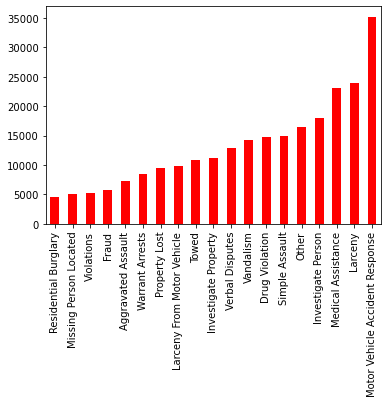

In [51]:
# the result for visualization.
df.OFFENSE_CODE_GROUP.value_counts().iloc[1:20].sort_values().plot(kind= "bar", color="red")

In [47]:
# Defining a function which will consider the following crimes as individual crimes and rest of as Others:
def topnine(row):
    keep = ["Motor Vehicle Accident Response", "Larceny",
            "Medical Assistance", "Investigate Person",
            "Drug Violation",
            "Simple Assault", "Vandalism",
            "Verbal Disputes", "Towed"]
    
    if row not in keep:
        
        return "OTHERS"
    else:
        
        return row

In [52]:
df["New_Type"] = df["OFFENSE_CODE_GROUP"].apply(topnine)


In [49]:
# Creating a dataframe returing '%' of top crime offense and others:

df_offense_top = df.groupby(['New_Type'])['New_Type'].count()/len(df)*100


df_offense_top

New_Type
Drug Violation                      3.287478
Investigate Person                  3.970873
Larceny                             5.294201
Medical Assistance                  5.114372
Motor Vehicle Accident Response     7.813359
OTHERS                             62.784267
Simple Assault                      3.306326
Towed                               2.415385
Vandalism                           3.139801
Verbal Disputes                     2.873938
Name: New_Type, dtype: float64

<AxesSubplot:title={'center':'Top Crimes-% (2015-2021)'}, ylabel='New_Type'>

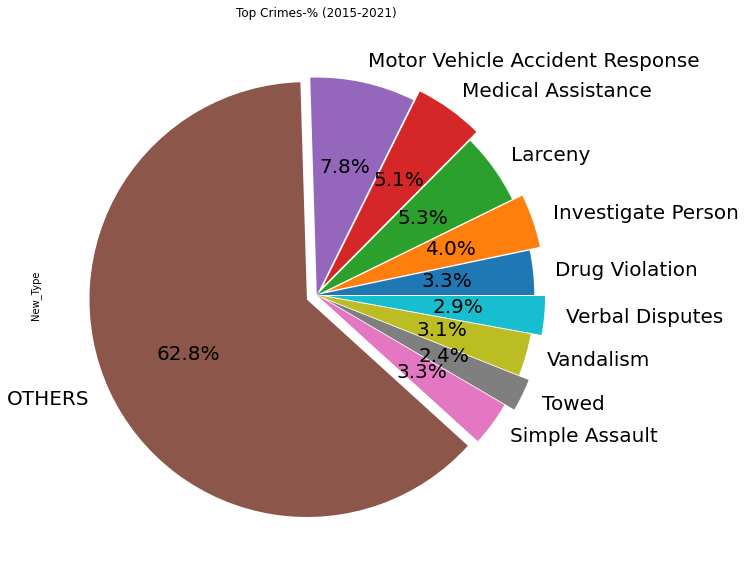

In [54]:
explode = [0,0.05,0,0.05,0,0.05,0,0.05,0,0.05]

df_offense_top.plot.pie(autopct="%.1f%%",title="Top Crimes-% (2015-2021)", figsize=(20,10), explode=explode, fontsize=20)

### **1.1 Analyzing a Specific Crime**

In [55]:
larceny=df[df.OFFENSE_CODE_GROUP.str.contains("Larceny").fillna(False)]

In [56]:
#    Check the size of the data “Larceny”
larceny.shape

(33651, 16)

### Analyzing Places

**want to know the data of crime incidents in different locations of Boston and, more specifically, what places in Boston are more dangerous.**




**Looking at the result, we can see the locations in Boston where larceny is more likely to happen are  Boylston St and Washington St.**



<AxesSubplot:ylabel='STREET'>

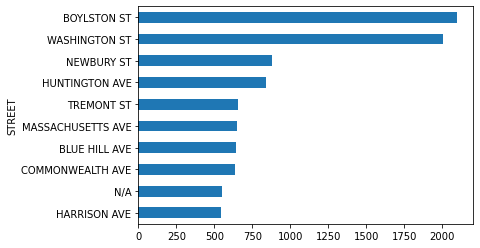

In [57]:
# visualization
larceny.groupby("STREET").size().sort_values(ascending = False).head(10).sort_values().plot(kind = "barh")

## 2. Analyzing crime comitted on the day of the week, month, year and Hour.

### 2.1 Analyzing crime on the day of the week

In [58]:
crime_weekly= df.groupby(['DAY_OF_WEEK'])['DAY_OF_WEEK'].count()/len(df)*100
crime_weekly

DAY_OF_WEEK
Friday       15.186792
Monday       14.377228
Saturday     14.042405
Sunday       12.727059
Thursday     14.553066
Tuesday      14.457054
Wednesday    14.656396
Name: DAY_OF_WEEK, dtype: float64

In [59]:
# but the returned DAY_OF_WEEK are not in order:

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# sorting the data according to the week

crime_weekly = crime_weekly[sorter]
crime_weekly

DAY_OF_WEEK
Monday       14.377228
Tuesday      14.457054
Wednesday    14.656396
Thursday     14.553066
Friday       15.186792
Saturday     14.042405
Sunday       12.727059
Name: DAY_OF_WEEK, dtype: float64

Text(0.5, 0, 'Day of the week')

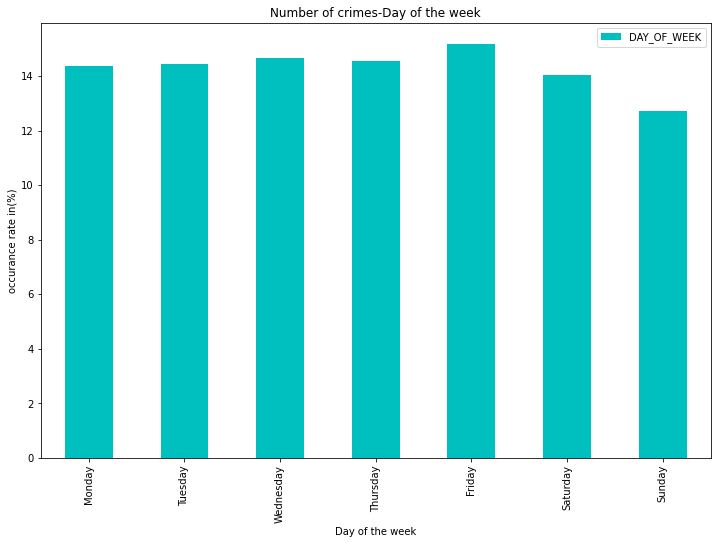

In [60]:
crime_weekly.plot(legend= True, kind='bar', title='Number of crimes-Day of the week', figsize=(12,8), color='c')
plt.ylabel('occurance rate in(%)')
plt.xlabel('Day of the week')

### 2.2 Analyzing crime month vise

<AxesSubplot:xlabel='MONTH'>

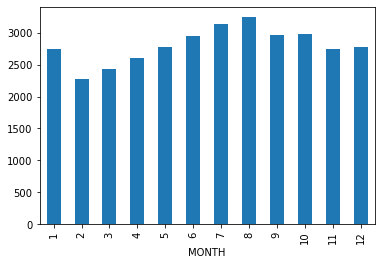

In [61]:
larceny.groupby("MONTH").size().plot(kind = "bar")

### 2.3 Analyzing crime commited yearly

In [62]:
crime_yearly= df.groupby(['YEAR'])['YEAR'].count()/len(df)*100
#returns the % of crime in perticular year of total crimes commited from2016 to 2021

crime_yearly

YEAR
2016    22.047345
2017    22.470420
2018    21.927164
2019     4.386408
2020    15.719848
2021    13.448814
Name: YEAR, dtype: float64

Text(0.5, 0, 'year')

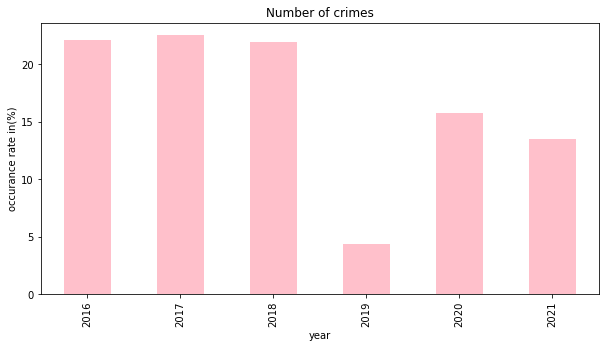

In [63]:
crime_yearly.plot(kind='bar', title='Number of crimes', figsize=(10,5), color='pink')
plt.ylabel('occurance rate in(%)')
plt.xlabel('year')

### 2.4 number of **larceny crime** incidents changes within a day

<AxesSubplot:xlabel='HOUR'>

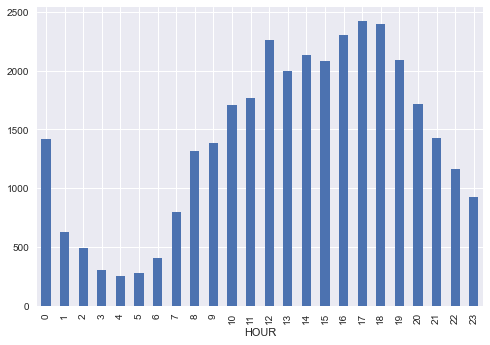

In [82]:
larceny.groupby("HOUR").size().plot(kind= "bar") 


In [85]:
larceny[larceny.YEAR==2018].groupby(['MONTH','HOUR']).size().unstack(0)

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
HOUR,,,,,,,,,,,,
0,39.0,45.0,39.0,49.0,43.0,50.0,40.0,40.0,42.0,44.0,35.0,42.0
1,17.0,19.0,18.0,14.0,19.0,22.0,20.0,19.0,18.0,15.0,17.0,16.0
2,14.0,11.0,5.0,13.0,15.0,15.0,10.0,15.0,16.0,18.0,13.0,20.0
3,5.0,8.0,6.0,5.0,8.0,14.0,10.0,11.0,11.0,3.0,6.0,5.0
4,6.0,4.0,5.0,4.0,18.0,6.0,4.0,7.0,7.0,7.0,7.0,9.0
5,4.0,7.0,NaN,6.0,7.0,4.0,14.0,9.0,9.0,5.0,8.0,8.0
6,8.0,6.0,14.0,8.0,12.0,12.0,16.0,14.0,14.0,12.0,10.0,10.0
7,28.0,18.0,11.0,18.0,33.0,27.0,29.0,33.0,25.0,27.0,31.0,21.0
8,31.0,24.0,36.0,33.0,38.0,35.0,40.0,44.0,38.0,44.0,40.0,31.0


array([<AxesSubplot:title={'center':'1'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'2'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'3'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'4'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'5'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'6'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'7'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'8'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'9'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'10'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'11'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'12'}, xlabel='HOUR'>], dtype=object)

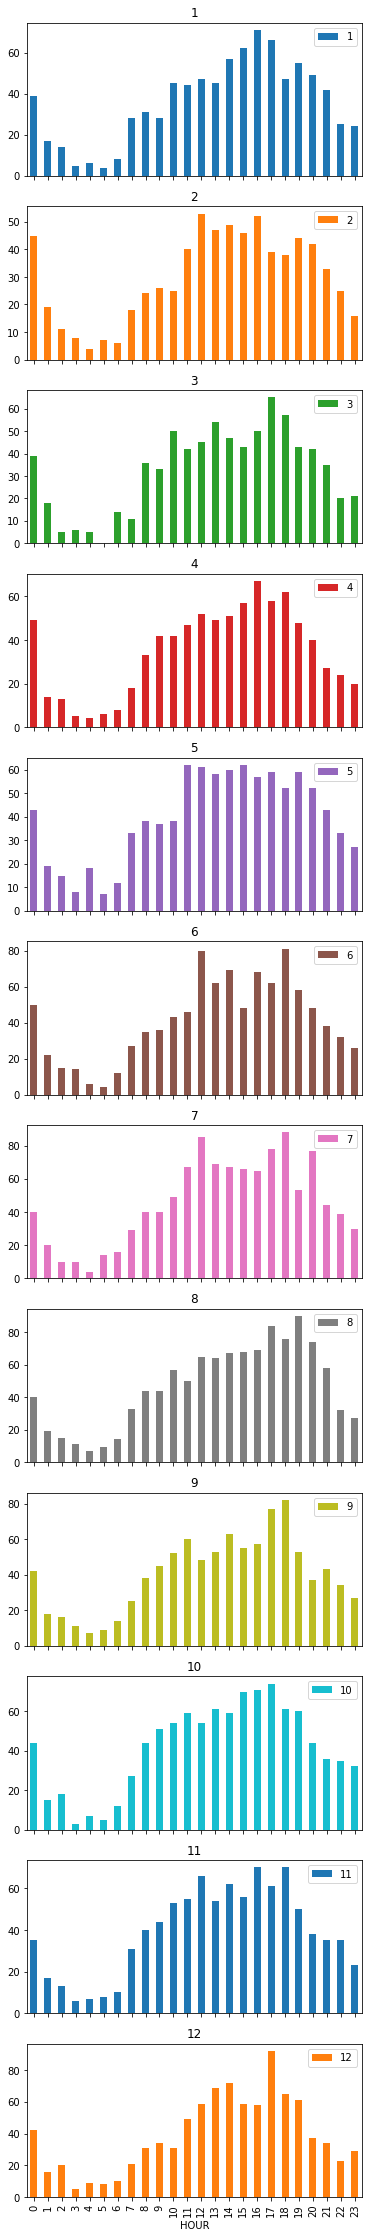

In [65]:
larceny[larceny.YEAR==2018].groupby(['MONTH','HOUR']).size().unstack(0).plot(subplots=True, kind = "bar", figsize = (6, 40))

### 3. Exploring "SHOOTING" Data

In [66]:
# creating a dataframe with no NaNs:

df_shooting = df[df.SHOOTING.notnull()]

In [67]:
df_shooting.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Location,New_Type
0,I192074738,2629,Harassment,HARASSMENT,C11,240.0,N/A,42614,2016,9,Thursday,0,Part Two,CONRAD ST,"(42.31872369, -71.06200077)",OTHERS
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760.0,N/A,42614.375,2016,9,Thursday,9,Part Two,BEECHCROFT ST,"(42.35167293, -71.16115206)",Simple Assault
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113.0,N/A,42584,2016,8,Tuesday,0,Part One,HIGH ST,"(42.35344834, -71.05658072)",Larceny
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113.0,N/A,42584,2016,8,Tuesday,0,Part Two,HIGH ST,"(42.35344834, -71.05658072)",OTHERS
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328.0,N/A,42619.54236,2016,9,Tuesday,13,Part Two,FERNBORO ST,"(42.31129587, -71.07728269)",OTHERS


**Analyzing Shooting happens yearly**

In [68]:
shooting_yearly= df_shooting.groupby(['YEAR'])['YEAR'].count()/len(df_shooting)*100

shooting_yearly

YEAR
2016    22.047345
2017    22.470420
2018    21.927164
2019     4.386408
2020    15.719848
2021    13.448814
Name: YEAR, dtype: float64

<AxesSubplot:title={'center':'Shooting - % (2016-2021)'}, ylabel='YEAR'>

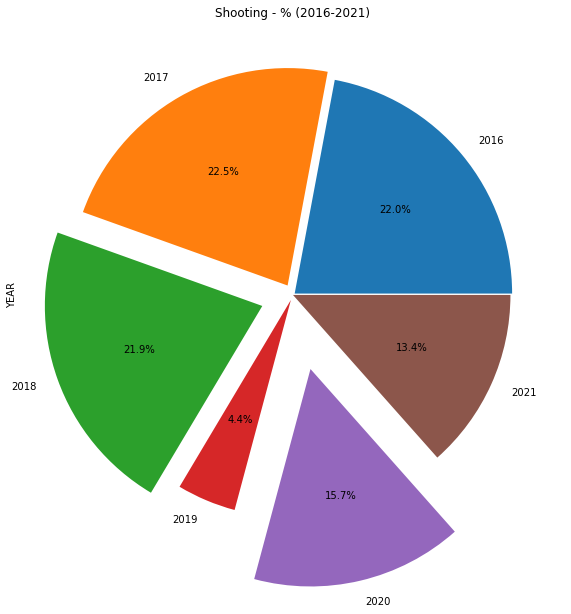

In [69]:
explode = [0.01,0.05,00.15,0.025,0.35,0]

shooting_yearly.plot.pie(autopct="%.1f%%", title="Shooting - % (2016-2021)", figsize=(20,10), explode=explode)

**Analyzing shooting happens monthly**

In [70]:
shooting_monthly= df_shooting.groupby(['MONTH'])['MONTH'].count()/len(df_shooting)*100
shooting_monthly

MONTH
1      7.806042
2      7.202251
3      7.891411
4      7.591622
5      8.408502
6      8.649309
7      8.683013
8      8.943333
9      8.755300
10    10.283735
11     8.073235
12     7.712247
Name: MONTH, dtype: float64

<AxesSubplot:title={'center':'Shooting per month-% (2015-2021)'}, ylabel='MONTH'>

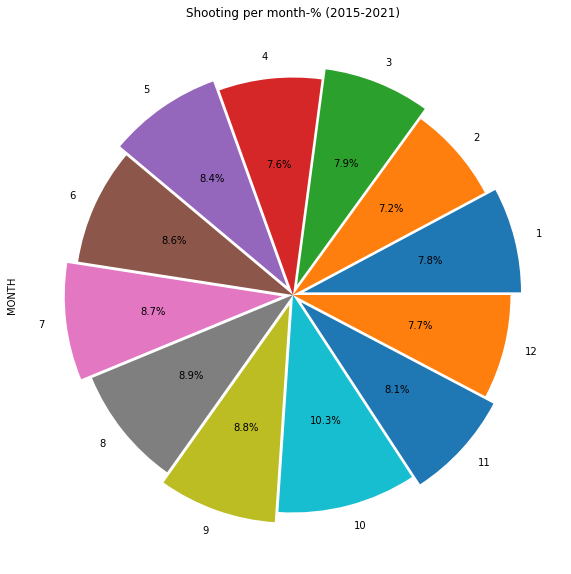

In [71]:
explode = [0.05,0,0.05,0,0.05,0,0.05,0,0.05,0,0.05,0]

shooting_monthly.plot.pie(autopct="%.1f%%", title="Shooting per month-% (2015-2021)", figsize=(20,10), fontsize=10, explode=explode)

### 4.Analyzing crime DISTRICT vise

/Users/vaishali/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


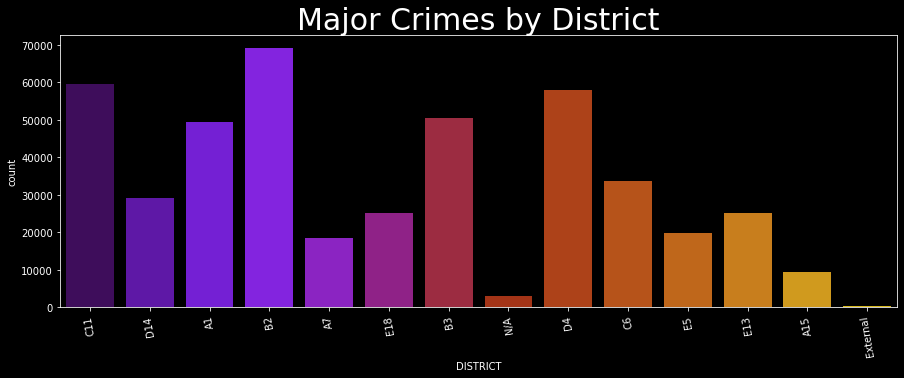

In [72]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('dark_background')

sns.countplot(df['DISTRICT'], palette = 'gnuplot')

plt.title('Major Crimes by District', fontweight = 30, fontsize = 30)
plt.xticks(rotation = 100)
plt.show()

### 4.1 Analyzing District, which District is more dangerous 

In [75]:
df.DISTRICT.value_counts().iloc[:20]

B2          69083
C11         59521
D4          57933
B3          50556
A1          49469
C6          33788
D14         29190
E18         25073
E13         25054
E5          19764
A7          18597
A15          9496
N/A          3021
External      439
Name: DISTRICT, dtype: int64

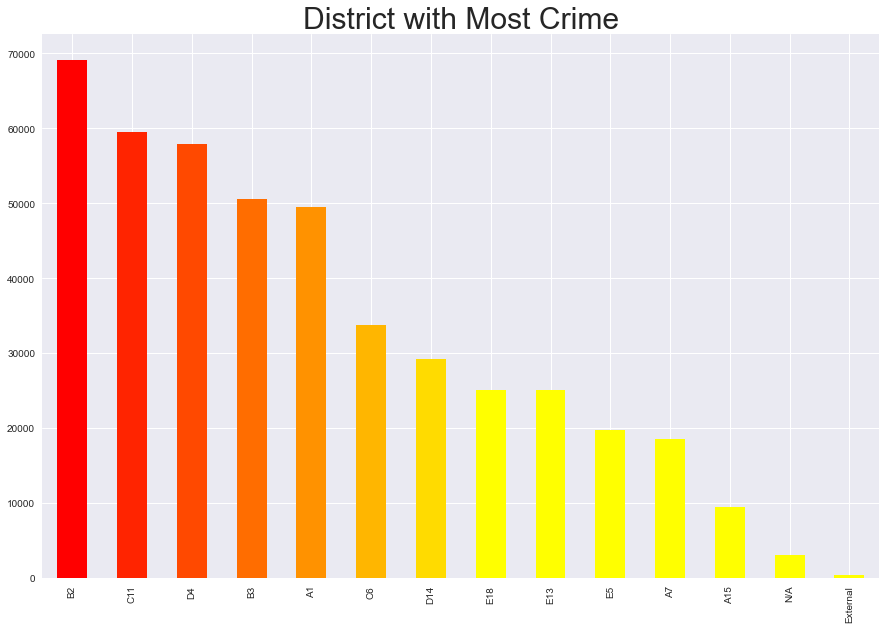

In [73]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.autumn(np.linspace(0, 2, 15))
df['DISTRICT'].value_counts().plot.bar(color = color, figsize = (15, 10))

plt.title('District with Most Crime',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

#### Here, B2,C11 and D4 is most dangeorous district where crime occures more frequently.

### 5. Analyzing Burglary occured on all week days

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='count'>

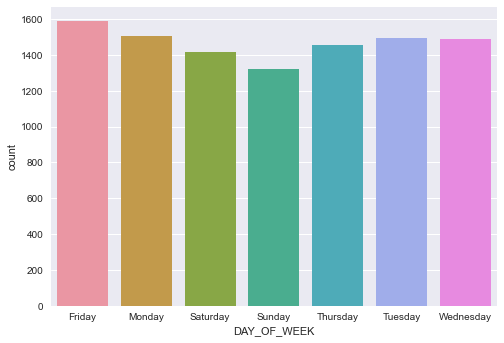

In [76]:
#Number of crimes on Robbery/Burglary occured on all week days

robbery=df[df['OFFENSE_CODE_GROUP'].str.contains("Robbery|BURGLARY", na=False,case=False)].groupby(['DAY_OF_WEEK']).size().reset_index(name='count')
sns.barplot(x = "DAY_OF_WEEK",y= "count", data=robbery)

### 6.Analyzing which period of time in the day is more safe/Dangeorous .

#### splitting the day into 'midnight','morning','afternoon','evening'

In [78]:
df['period']= pd.cut( df.HOUR,[0,6,12,18,23],labels=['MIDNIGHT','MORNING','AFTERNOON','EVENING'],include_lowest=True)
df['period']

0          MIDNIGHT
1           MORNING
2          MIDNIGHT
3          MIDNIGHT
4         AFTERNOON
            ...    
450979      MORNING
450980     MIDNIGHT
450981      MORNING
450982    AFTERNOON
450983     MIDNIGHT
Name: period, Length: 450984, dtype: category
Categories (4, object): ['MIDNIGHT' < 'MORNING' < 'AFTERNOON' < 'EVENING']

### 6.1 find out the maximum number of shootings happening in a particular period.

In [79]:
shooting=df.loc[df['SHOOTING']=='Y'].groupby('period').size().reset_index(name='count')

<AxesSubplot:xlabel='period', ylabel='count'>

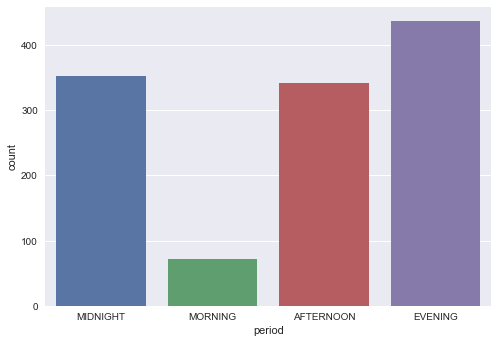

In [80]:
sns.barplot(x ="period",y= "count", data=shooting)

####  we can see from the graph that most shooting occured in the evening time in past years.

### 7. Analyzing in between which hour/time crime occured most.

/Users/vaishali/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HOUR', ylabel='count'>

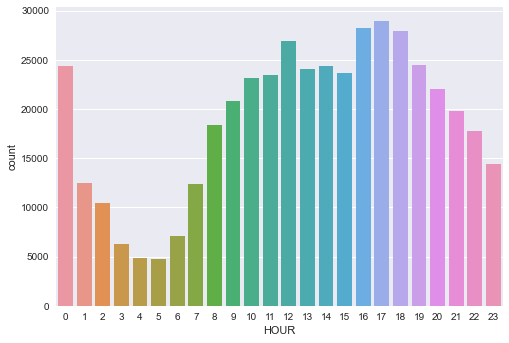

In [81]:
sns.countplot('HOUR',data= df)

#### We can see that, In the evening most crime occured at 5:00 PM,4:00 PM and 6:00 PM.